In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
# Creating csv path and loading first data in Pandas DataFrame

csv_path = ("data/music_data.csv")
data_df = pd.read_csv(csv_path)
data_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature,genre,song_name,duration_min
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,2Vc6NJ9PW9gD9q343XFRKx,4,Dark Trap,Mercury: Retrograde,2.075650
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,7pgJBLVz5VmnL7uGHmRj6p,4,Dark Trap,Pathology,3.740450
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,0vSWgAlfpye0WCGeNmuNhy,4,Dark Trap,Symbiote,1.647017
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,0VSXnJqQkwuH2ei1nOQ1nu,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),2.061017
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,4jCeguq9rMTlbMmPHuO7S3,4,Dark Trap,Venom,2.054967


In [3]:
# Checking the data type

data_df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
id                   object
time_signature        int64
genre                object
song_name            object
duration_min        float64
dtype: object

In [4]:
# Dropping values which are not required
data_df.drop(['id', 'song_name', 'time_signature',], axis = 1, inplace = True)

In [5]:
data_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_min
0,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,0.3890,156.985,Dark Trap,2.075650
1,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,0.1240,115.080,Dark Trap,3.740450
2,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,0.0391,218.050,Dark Trap,1.647017
3,0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,0.1750,186.948,Dark Trap,2.061017
4,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,0.5910,147.988,Dark Trap,2.054967
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21514,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,0.2520,160.299,Hiphop,3.493033
21515,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,0.5280,154.272,Hiphop,3.564967
21516,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,0.5060,184.160,Hiphop,4.531117
21517,0.747,0.832,3,-5.737,0,0.1850,0.23300,0.000014,0.1300,0.7330,188.760,Hiphop,3.034000


In [6]:
data_df.shape

(21519, 13)

In [46]:
data_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
count,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000
mean,0.674583,0.657252,5.144942,-7.039576,0.583020,0.178072,0.167282,0.075957,0.195378,0.417385,151.480713,3.242029
std,0.159427,0.175719,3.693472,2.906579,0.493071,0.140648,0.208450,0.220703,0.151472,0.233708,29.137425,1.006274
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.021000,0.020600,57.967000,0.638883
25%,0.566000,0.535000,1.000000,-8.645500,0.000000,0.056850,0.016800,0.000000,0.101000,0.223000,129.961000,2.511917
50%,0.697000,0.660000,5.000000,-6.687000,1.000000,0.133000,0.080000,0.000001,0.130000,0.401000,149.648000,3.193117
75%,0.796000,0.792000,8.000000,-5.049500,1.000000,0.277000,0.239000,0.000713,0.250000,0.593000,174.029000,3.843942
max,0.988000,0.999000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.973000,0.980000,220.290000,12.140217


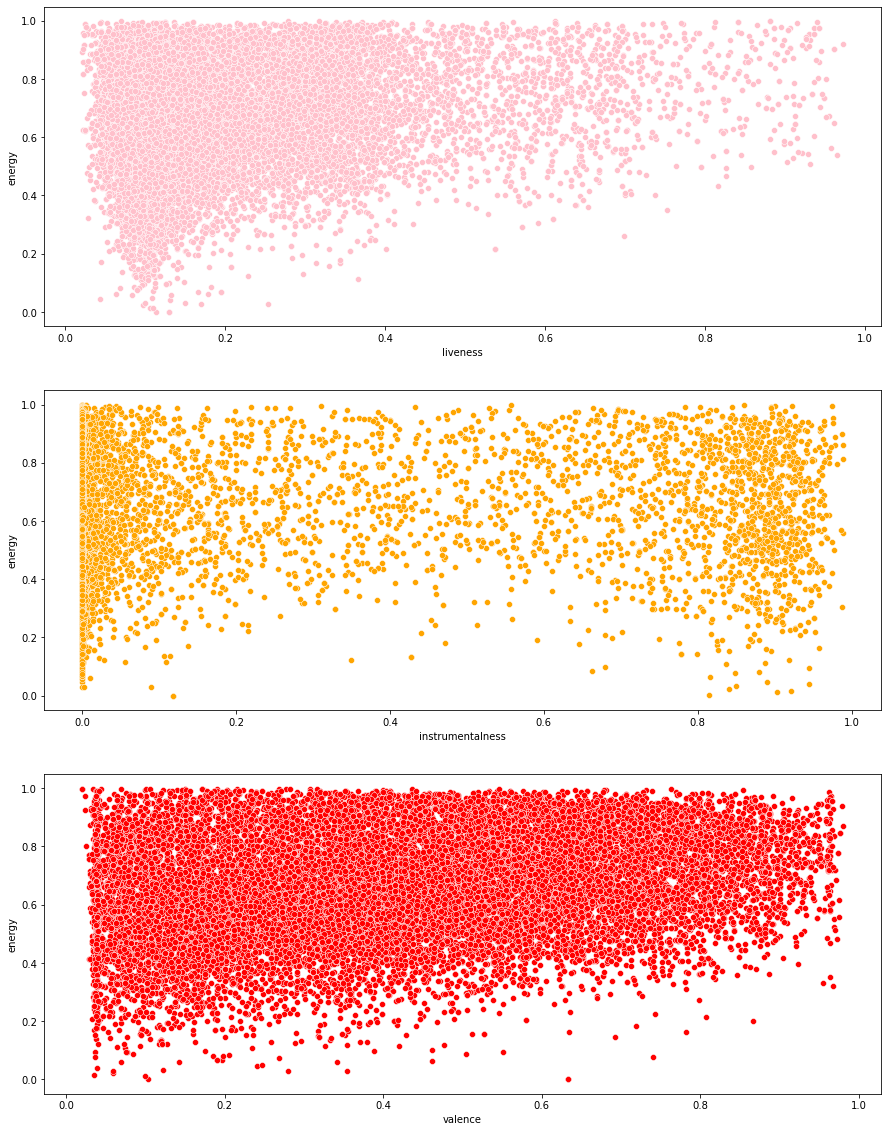

In [53]:
fig, ax =plt.subplots(3,1, figsize=(15,20))
sns.scatterplot(x = data_df['valence'], y = data_df['energy'], ax = ax[2], color = "red")
sns.scatterplot(x = data_df['instrumentalness'], y = data_df['energy'], ax = ax[1], color = "orange")
sns.scatterplot(x = data_df['liveness'], y = data_df['energy'], ax = ax[0], color = "pink")

def save_multi_image(filename):
    pp = PdfPages(filename)
    fig_nums = plt.get_fignums()
    figs = [plt.figure(n) for n in fig_nums]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()

filename = "multi.pdf"
save_multi_image(filename)

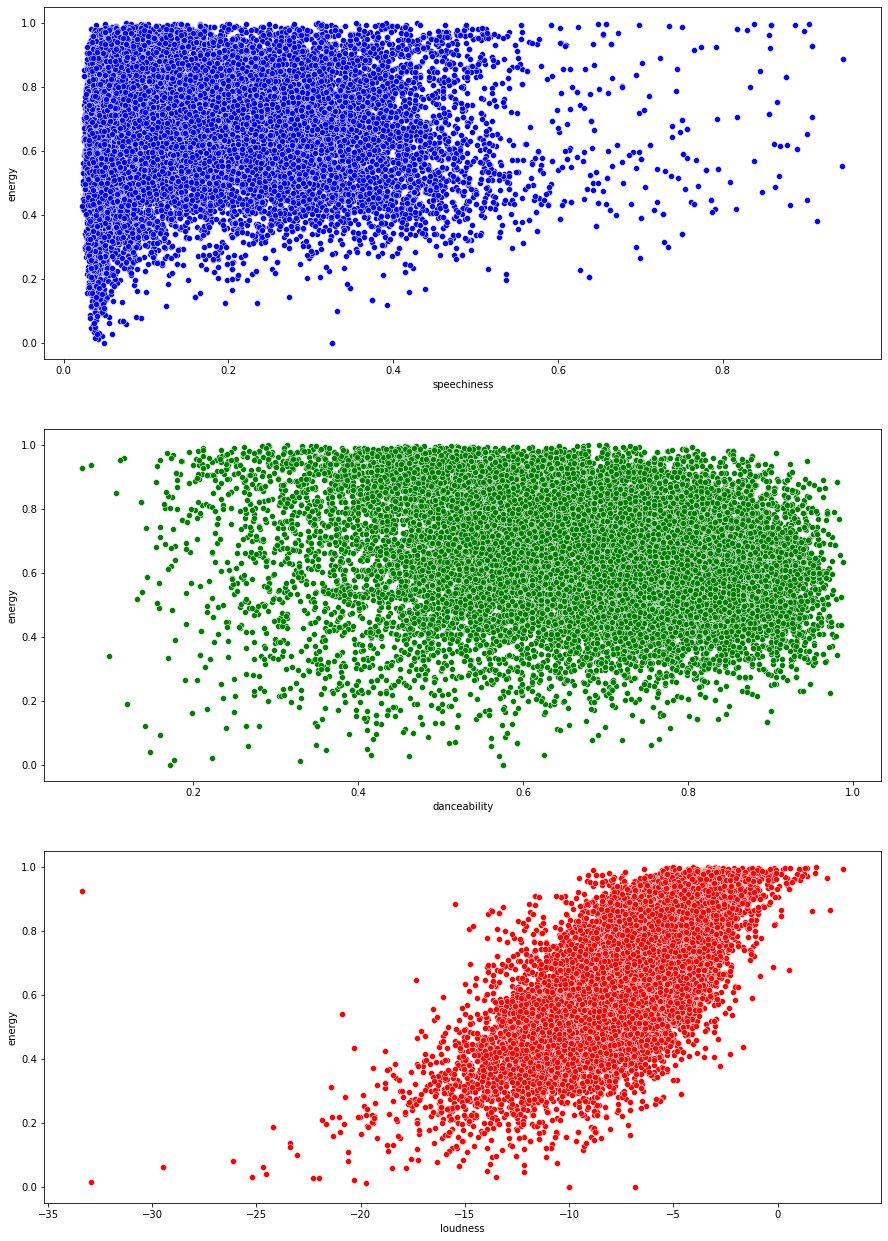

In [51]:
fig, ax =plt.subplots(3,1, figsize=(15,22))
sns.scatterplot(x = data_df['loudness'], y = data_df['energy'], ax = ax[2], color = "red")
sns.scatterplot(x = data_df['danceability'], y = data_df['energy'], ax = ax[1], color = "green")
sns.scatterplot(x = data_df['speechiness'], y = data_df['energy'], ax = ax[0], color = "blue")

def save_multi_image(filename):
    pp = PdfPages(filename)
    fig_nums = plt.get_fignums()
    figs = [plt.figure(n) for n in fig_nums]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()

filename = "image.pdf"
save_multi_image(filename)

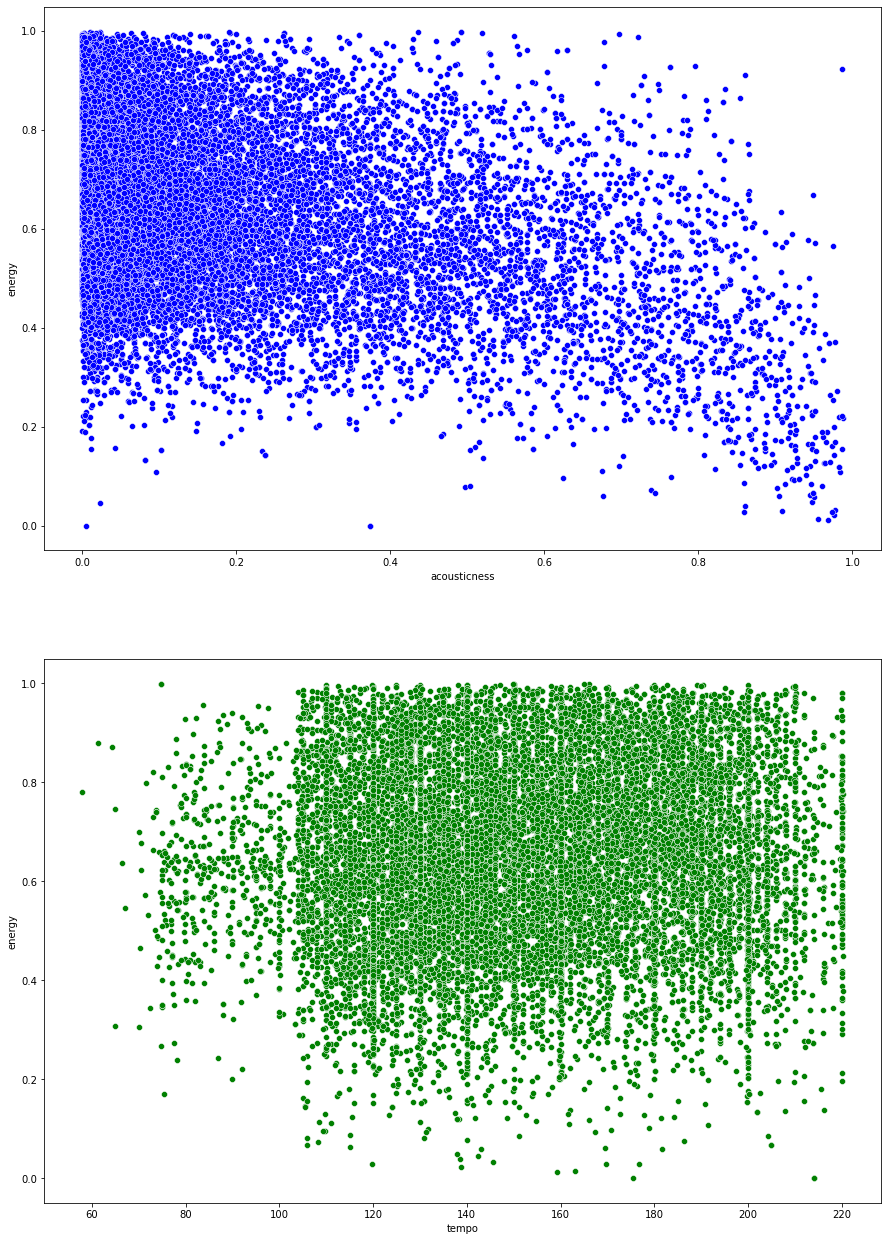

In [52]:
fig, ax =plt.subplots(2,1, figsize=(15,22))
sns.scatterplot(x = data_df['acousticness'], y = data_df['energy'], ax = ax[0], color = "blue")
sns.scatterplot(x = data_df['tempo'], y = data_df['energy'], ax = ax[1], color = "green")

def save_multi_image(filename):
    pp = PdfPages(filename)
    fig_nums = plt.get_fignums()
    figs = [plt.figure(n) for n in fig_nums]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()

filename = "img.pdf"
save_multi_image(filename)